In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os 
#import cv2
import glob
import sys
from random import shuffle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
import itertools
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import TensorBoard
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
print(sys.executable)
print(sys.version)

c:\users\33762\appdata\local\programs\python\python39\python.exe
3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]


### Training a Keras Sequential model with X and y as a numpy array


In [77]:
img_size=100
def create_data_cv2(path,img_size,name_numpy):
    training_data=[]
    for img in os.listdir(path):
        if img.split('.')[0]=='cat':
            label=[0,1]
        if img.split('.')[0]=='dog':
            label=[1,0]
        img_path=os.path.join(path,img)
        img_array=cv2.imread(img_path)
        img_array=cv2.resize(img_array,(img_size,img_size))
        training_data.append([np.array(img_array),np.array(label)])
    np.save(name_numpy+str('.npy'),training_data)
    return training_data

In [78]:
path=r"C:\Users\33762\Desktop\ML\PYTHON\CNN\tensorflow\CatsVsDog_Data\train\train"
training_data=create_data_cv2(path,100,'numpy_file_data')

c:\users\33762\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [79]:
#import random 
#train=random.sample(list(training_data),2000)
#test=random.sample(list(training_data),100)

In [80]:
random.shuffle(training_data) #to shuffle the data
X_train=[]
y_train=[]
#X_test=[]
#y_test=[]
for feature, label in training_data: # all the data 
    X_train.append(feature)
    y_train.append(label)

#for feature, label in test:
#    X_test.append(feature)
#    y_test.append(label)

X_train=np.array(X_train)
y_train=np.array(y_train)
print('Shape  of X_train : {}'.format(X_train.shape))
print('Shape of y_train : {}'.format(y_train.shape))
X_train_norm=X_train/255 # normalization

#X_test=np.array(X_test)
#y_test=np.array(y_test)#.reshape(-1,1)
#print('Shape of X_test  : {}'.format(X_test.shape))
#print('Shape of y_test  : {}'.format(y_test.shape))
#X_test_norm=X_test/255

Shape  of X_train : (25000, 100, 100, 3)
Shape of y_train : (25000, 2)


In [81]:
def plotImage(features,label):
    fig,axes =plt.subplots(2,5,figsize=(20,8))
    axes=axes.flatten()
    for  i,(image,ax) in enumerate(zip(features,axes)):
        ax.imshow(image)
        ax.axis('off')
        ax.title.set_text('{}'.format(['cat','dog'][label[:,0][i]]))

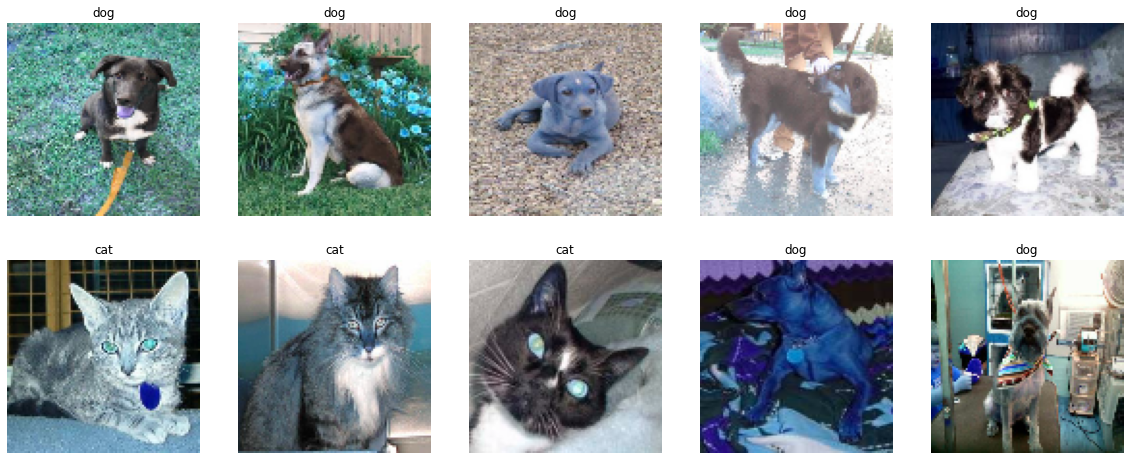

In [82]:
plotImage(X_train,y_train)

In [68]:
#Modeling
model_s=Sequential()
model_s.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu',input_shape=(img_size,img_size,3)))
model_s.add(MaxPooling2D(pool_size=2))
model_s.add(Dropout(0.2))


model_s.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model_s.add(MaxPooling2D(pool_size=2))
model_s.add(Dropout(0.2))

model_s.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model_s.add(MaxPooling2D(pool_size=2))
model_s.add(Dropout(0.2))


model_s.add(Flatten())
model_s.add(Dense(128, activation='relu'))
model_s.add(Dropout(0.5))

model_s.add(Dense(2, activation='softmax'))
model_s.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 128)      

In [186]:
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model_s.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

history=model_s.fit(X_train_norm,y_train,batch_size=32,epochs=10,verbose=1,
               validation_split=0.02)

Epoch 1/10
766/766 [==============================] - 31247s 41s/step - loss: 0.6785 - accuracy: 0.5664 - val_loss: 0.7611 - val_accuracy: 0.3300
Epoch 2/10
766/766 [==============================] - 601s 784ms/step - loss: 0.6424 - accuracy: 0.6238 - val_loss: 0.7250 - val_accuracy: 0.3660
Epoch 3/10
766/766 [==============================] - 618s 806ms/step - loss: 0.5921 - accuracy: 0.6818 - val_loss: 0.5415 - val_accuracy: 0.7080
Epoch 4/10
766/766 [==============================] - 18173s 24s/step - loss: 0.5471 - accuracy: 0.7190 - val_loss: 0.7549 - val_accuracy: 0.5580
Epoch 5/10
766/766 [==============================] - 2915s 4s/step - loss: 0.4995 - accuracy: 0.7564 - val_loss: 0.3345 - val_accuracy: 0.8560
Epoch 6/10
766/766 [==============================] - 586s 766ms/step - loss: 0.4644 - accuracy: 0.7811 - val_loss: 0.5072 - val_accuracy: 0.7380
Epoch 7/10
766/766 [==============================] - 589s 769ms/step - loss: 0.4330 - accuracy: 0.7997 - val_loss: 0.3218 - v

<Figure size 432x288 with 0 Axes>

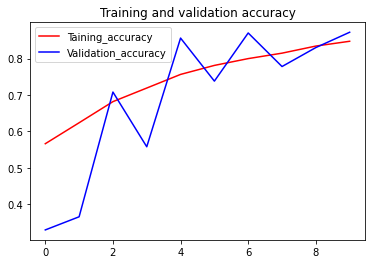

<Figure size 432x288 with 0 Axes>

In [195]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))

plt.plot(epochs,acc,'r',label='Taining_accuracy')
plt.plot(epochs,val_acc,'b',label='Validation_accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [ ]:
model_s.save("my_model2_100x100")

### Training with a Functional Keras API (VGG16)

Training with keras generator data (infinite data )

In [96]:
os.getcwd()

'C:\\Users\\33762\\Desktop\\ML\\PYTHON\\CNN\\tensorflow\\streamlit'

In [97]:
os.chdir(r'C:\Users\33762\Desktop\ML\PYTHON\CNN\tensorflow\streamlit')
if os.path.isdir('training_data/dog') is False:
    os.makedirs('training_data/dog')
    os.makedirs('training_data/cat')
    os.makedirs('validation_data/dog')
    os.makedirs('validation_data/cat')

#for img in random.sample(glob.glob('./train/cat*'),2000):
#    shutil.move(img,'training_data/cat')
#for img in random.sample(glob.glob('./train/dog*'),2000):
#    shutil.move(img,'training_data/dog')
#
#for img in random.sample(glob.glob('./train/cat*'),200):
#    shutil.move(img,'validation_data/cat')
#for img in random.sample(glob.glob('./train/dog*'),200):
#    shutil.move(img,'validation_data/dog')

In [8]:
img_size=200
train_path =r'C:\Users\33762\Desktop\ML\PYTHON\CNN\tensorflow\streamlit\training_data'
validation_path =r'C:\Users\33762\Desktop\ML\PYTHON\CNN\tensorflow\streamlit\validation_data'

train_dataset= ImageDataGenerator(rescale=1./255).flow_from_directory(directory=train_path,
                                                                      target_size=(img_size,img_size),
                                                                      batch_size=32,
                                                                      classes=['cat','dog']
                                                                     )

val_dataset= ImageDataGenerator(rescale=1./255).flow_from_directory(directory=validation_path,
                                                                      target_size=(img_size,img_size),
                                                                      batch_size=32,
                                                                      classes=['cat','dog']
                                                                     )

Found 4000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [9]:
train_dataset.class_indices

{'cat': 0, 'dog': 1}

In [11]:
#Function to show the first 10 images from the first batch.
def plotImagebatch(features,label):
    fig,axes =plt.subplots(2,5,figsize=(20,8))
    axes=axes.flatten()
    for  i,(image,ax) in enumerate(zip(features,axes)):
        ax.imshow(image)
        ax.axis('off')
        ax.title.set_text('{}'.format(['cat','dog'][int(label[:,1][i])]))
        #ax.title.set_text('{}'.format(['cat','dog'][label[:,0][i]]))

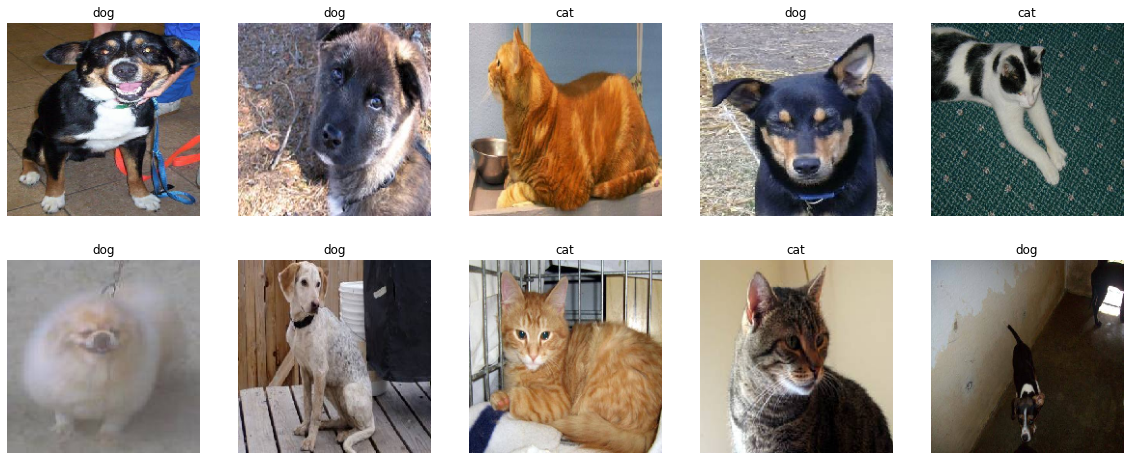

In [12]:
my_batch,label=next(train_dataset)
plotImagebatch(my_batch,label)

In [175]:
from keras.applications.vgg16 import VGG16 # le VGG 16 de base contient 1000 output,
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
 
# define cnn model => load model
model_vgg16 = VGG16(include_top=False, input_shape=(img_size, img_size, 3))
# mark loaded layers as not trainable
for layer in model_vgg16.layers:
    layer.trainable = False
    
# add new layers
flat1 = Flatten()(model_vgg16.layers[-1].output)
#class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(2, activation='softmax')(flat1)

# define the new model
model_vgg16 = Model(inputs=model_vgg16.inputs, outputs=output)

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model_vgg16.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model_vgg16.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0  

In [253]:
from tensorflow.keras.callbacks import TensorBoard
tensorboard=TensorBoard(log_dir=f'logs_catsVsdogs\VGG16_bsize32_imgs100_{time.time()}')

In [177]:
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model_vgg16.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

history=model_vgg16.fit(train_dataset,epochs=10,verbose=1,
               validation_data=val_dataset,
                callbacks= tensorboard)

Epoch 1/10
125/125 [==============================] - 4607s 37s/step - loss: 6.9157 - accuracy: 0.7510 - val_loss: 1.2872 - val_accuracy: 0.8925
Epoch 2/10
125/125 [==============================] - 4506s 36s/step - loss: 2.4965 - accuracy: 0.8525 - val_loss: 1.5558 - val_accuracy: 0.8800
Epoch 3/10
125/125 [==============================] - 5252s 42s/step - loss: 1.7731 - accuracy: 0.8785 - val_loss: 1.1198 - val_accuracy: 0.8950
Epoch 4/10
125/125 [==============================] - 4655s 37s/step - loss: 0.7889 - accuracy: 0.9190 - val_loss: 1.6330 - val_accuracy: 0.8775
Epoch 5/10
125/125 [==============================] - 4689s 38s/step - loss: 1.5487 - accuracy: 0.8888 - val_loss: 1.2051 - val_accuracy: 0.9000
Epoch 6/10
125/125 [==============================] - 4616s 37s/step - loss: 1.5979 - accuracy: 0.8913 - val_loss: 1.4218 - val_accuracy: 0.9050
Epoch 7/10
125/125 [==============================] - 4645s 37s/step - loss: 1.6020 - accuracy: 0.8870 - val_loss: 1.1591 - val_ac

In [1]:
%load_ext tensorboard
%tensorboard --logdir logs_catsVsdogs 

In [ ]:
model_vgg16.save("modelVF1_vgg16_200x200")

<Figure size 432x288 with 0 Axes>

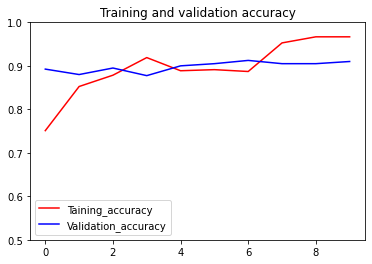

<Figure size 432x288 with 0 Axes>

In [188]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))

plt.plot(epochs,acc,'r',label='Taining_accuracy')
plt.plot(epochs,val_acc,'b',label='Validation_accuracy')
plt.ylim(0.5,1)
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [13]:
if os.path.isdir('test_data/dog') is False:
    os.makedirs('test_data/dog')
    os.makedirs('test_data/cat')

#for img in random.sample(glob.glob('./train/cat*'),50):
#    shutil.move(img,'test_data/cat')
#for img in random.sample(glob.glob('./train/dog*'),50):
#    shutil.move(img,'test_data/dog')



Found 100 images belonging to 2 classes.


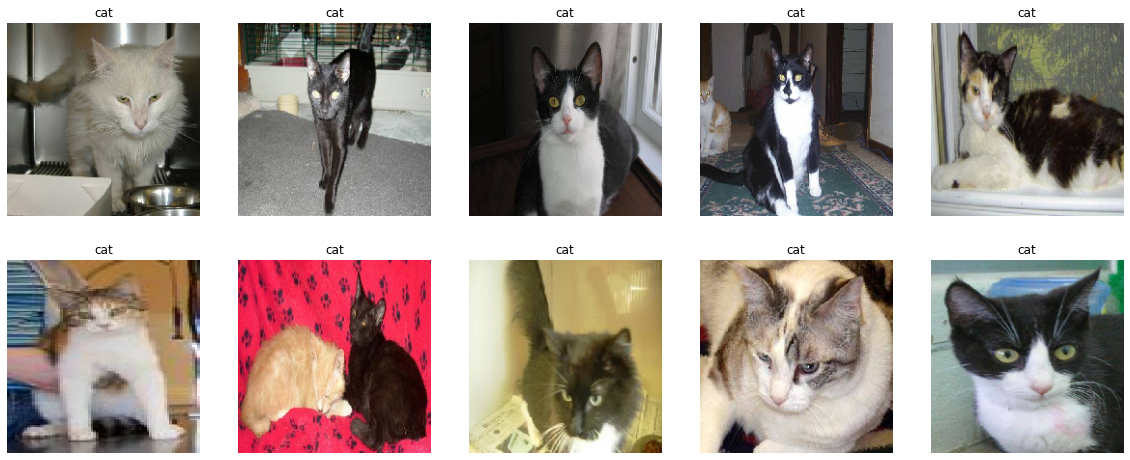

In [118]:
img_size=200
test_path=r'C:\Users\33762\Desktop\ML\PYTHON\CNN\tensorflow\streamlit\test_data'
test_dataset= ImageDataGenerator(rescale=1./255).flow_from_directory(directory=test_path,
                                                                      target_size=(img_size,img_size),
                                                                      batch_size=50,
                                                                      classes=['cat','dog'],
                                                                      shuffle=False
                                                                     )
my_test_batch,labels=next(test_dataset)
plotImagebatch(my_test_batch,labels)


In [120]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Define the plot_confusion_matrix() function

In [16]:
def skplot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [122]:
modelVGG16=tf.keras.models.load_model('modelVF1_vgg16_200x200')
prediction=modelVGG16.predict(test_dataset,steps=len(test_dataset))

In [123]:
def plotImagebatch_pred(features,label,pred):
    fig,axes =plt.subplots(4,5,figsize=(20,8))
    axes=axes.flatten()
    for  i,(image,ax) in enumerate(zip(features,axes)):
        ax.imshow(image)
        ax.axis('off')
        #ax.title.set_text('Prediction :{} / Label  :{}'.format(['cat','dog'][np.argmax(pred,axis=1)[i]],
        #                                                          ['cat','dog'][int(label[:,1][i])]))
        ax.title.set_text('Prediction OK' if  ['cat','dog'][np.argmax(prediction,axis=1)[i]]==['cat','dog'][int(label[:,1][i])] 
                                          else 'Prediction Nok')

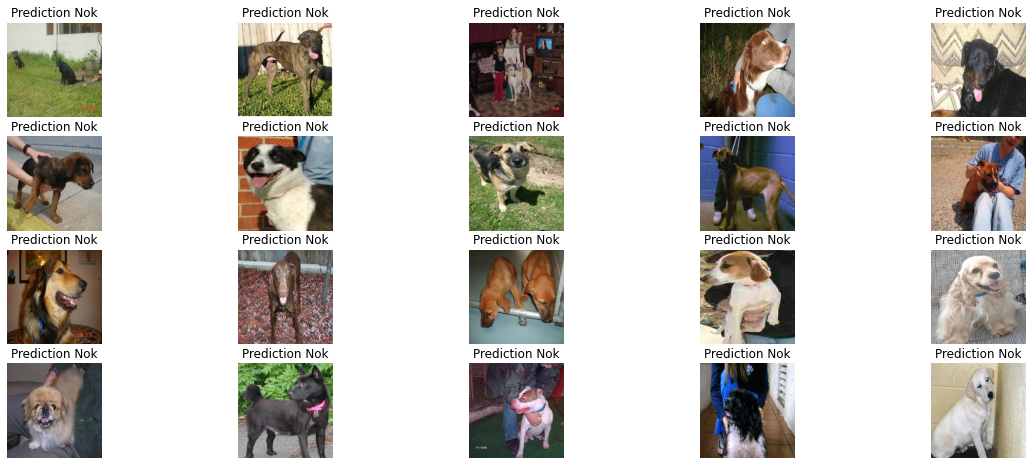

In [124]:
my_test_batch,labels=next(test_dataset)
plotImagebatch_pred(my_test_batch,labels,prediction)

Confusion matrix, without normalization
[[47  3]
 [11 39]]


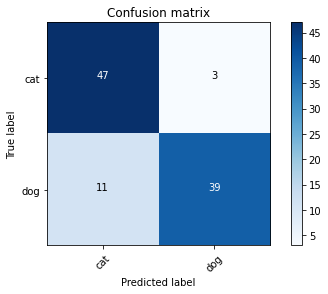

In [125]:
cm=confusion_matrix(y_true=test_dataset.classes,y_pred=np.argmax(prediction,axis=-1))
skplot_confusion_matrix(cm,classes=['cat','dog'], title='Confusion matrix')

## VGG16 with its all layers


In [127]:
os.chdir(r'C:\Users\33762\Desktop\ML\PYTHON\CNN\tensorflow\streamlit')
if os.path.isdir('training_data2/dog') is False:
    os.makedirs('training_data2/dog')
    os.makedirs('training_data2/cat')
    os.makedirs('validation_data2/dog')
    os.makedirs('validation_data2/cat')

for img in random.sample(glob.glob('./train/cat*'),500):
    shutil.move(img,'training_data2/cat')
for img in random.sample(glob.glob('./train/dog*'),500):
    shutil.move(img,'training_data2/dog')

for img in random.sample(glob.glob('./train/cat*'),100):
    shutil.move(img,'validation_data2/cat')
for img in random.sample(glob.glob('./train/dog*'),100):
    shutil.move(img,'validation_data2/dog')

In [10]:
img_size=224
train_path =r'C:\Users\33762\Desktop\ML\PYTHON\CNN\tensorflow\streamlit\training_data2'
validation_path =r'C:\Users\33762\Desktop\ML\PYTHON\CNN\tensorflow\streamlit\validation_data2'

train_dataset2= ImageDataGenerator(rescale=1./255).flow_from_directory(directory=train_path,
                                                                      target_size=(img_size,img_size),
                                                                      batch_size=32,
                                                                      classes=['cat','dog']
                                                                     )

val_dataset2= ImageDataGenerator(rescale=1./255).flow_from_directory(directory=validation_path,
                                                                      target_size=(img_size,img_size),
                                                                      batch_size=32,
                                                                      classes=['cat','dog']
                                                                     )

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [8]:
from keras.applications.vgg16 import VGG16 # le VGG 16 de base contient 1000 output,
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
img_size=224
# define cnn model => load model
M_vgg16 = VGG16(include_top=True, input_shape=(img_size, img_size, 3))
# mark loaded layers as not trainable
for layer in M_vgg16.layers:
    layer.trainable = False
    
# add thr top layers with only 2 classes
output = Dense(2, activation='softmax')(M_vgg16.layers[-2].output)

# define the new model
M_vgg16 = Model(inputs=M_vgg16.inputs, outputs=output)

# compile model
opt = SGD(lr=0.001, momentum=0.9)
M_vgg16.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
M_vgg16.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

C:\Users\33762\.conda\envs\tensorflow\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [130]:
tensorboard=TensorBoard(log_dir=f'logs_catsVsdogs\VGG16_all_bsize32_imgs224_{time.time()}')
hist2=M_vgg16.fit(x=train_dataset2,epochs=10,
          validation_data=val_dataset2,
          callbacks=tensorboard)

Epoch 1/10
32/32 [==============================] - 1100s 34s/step - loss: 0.6969 - accuracy: 0.5610 - val_loss: 0.6332 - val_accuracy: 0.6600
Epoch 2/10
32/32 [==============================] - 1267s 40s/step - loss: 0.6289 - accuracy: 0.6500 - val_loss: 0.6303 - val_accuracy: 0.5800
Epoch 3/10
32/32 [==============================] - 1345s 42s/step - loss: 0.5374 - accuracy: 0.7450 - val_loss: 0.5140 - val_accuracy: 0.7850
Epoch 4/10
32/32 [==============================] - 1272s 40s/step - loss: 0.5205 - accuracy: 0.7460 - val_loss: 0.5077 - val_accuracy: 0.7550
Epoch 5/10
32/32 [==============================] - 1262s 40s/step - loss: 0.4647 - accuracy: 0.8000 - val_loss: 0.4719 - val_accuracy: 0.7700
Epoch 6/10
32/32 [==============================] - 1346s 43s/step - loss: 0.4365 - accuracy: 0.8190 - val_loss: 0.4454 - val_accuracy: 0.7900
Epoch 7/10
32/32 [==============================] - 1346s 42s/step - loss: 0.4317 - accuracy: 0.8170 - val_loss: 0.4350 - val_accuracy: 0.8150

<Figure size 432x288 with 0 Axes>

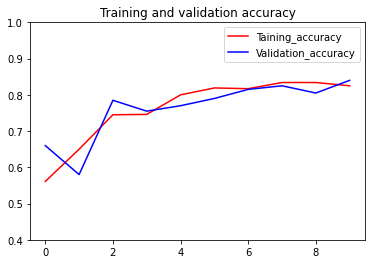

<Figure size 432x288 with 0 Axes>

In [134]:
acc=hist2.history['accuracy']
val_acc=hist2.history['val_accuracy']
epochs=range(len(acc))

plt.plot(epochs,acc,'r',label='Taining_accuracy')
plt.plot(epochs,val_acc,'b',label='Validation_accuracy')
plt.ylim(0.4,1)
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [131]:
M_vgg16.save("model_vgg16_alllayers_224x224")

INFO:tensorflow:Assets written to: model_vgg16_alllayers_224x224\assets


Found 100 images belonging to 2 classes.


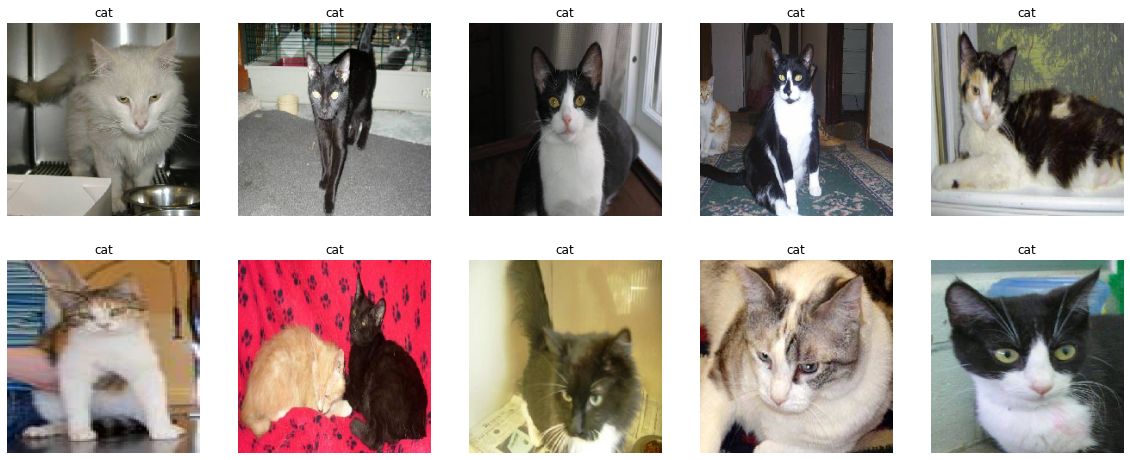

In [156]:
img_size=224
test_path=r'C:\Users\33762\Desktop\ML\PYTHON\CNN\tensorflow\streamlit\test_data'
test_dataset2= ImageDataGenerator(rescale=1./255).flow_from_directory(directory=test_path,
                                                                      target_size=(img_size,img_size),
                                                                      batch_size=32,
                                                                      classes=['cat','dog'],
                                                                      shuffle=False
                                                                     )
my_test_batch2,labels2=next(test_dataset2)
plotImagebatch(my_test_batch2,labels2)


In [161]:
M_vgg16=tf.keras.models.load_model("model_vgg16_alllayers_224x224")
prediction=M_vgg16.predict(test_dataset2,steps=len(test_dataset2))

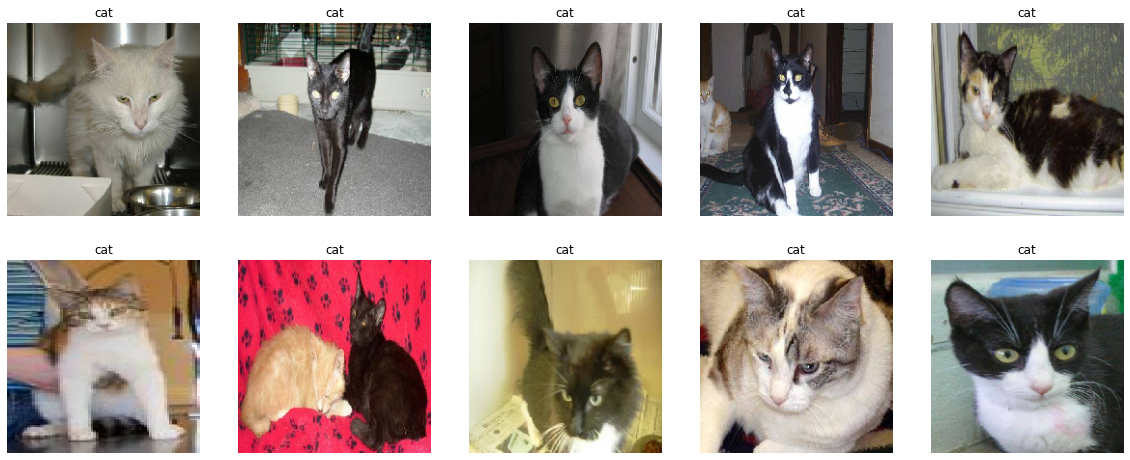

In [169]:
my_test_batch,labels=next(test_dataset)
plotImagebatch(my_test_batch,labels)

Confusion matrix, without normalization
[[40 10]
 [ 6 44]]


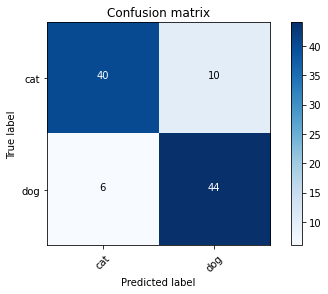

In [164]:
cm=confusion_matrix(y_true=test_dataset2.classes,y_pred=np.argmax(prediction,axis=-1))
skplot_confusion_matrix(cm,classes=['cat','dog'], title='Confusion matrix')

### MobileNet : training on CatsVsDog data

In [6]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [11]:
img_size=224
train_path =r'C:\Users\33762\Desktop\ML\PYTHON\CNN\tensorflow\streamlit\training_data'
validation_path =r'C:\Users\33762\Desktop\ML\PYTHON\CNN\tensorflow\streamlit\validation_data'

train_dataset3= ImageDataGenerator(rescale=1./255).flow_from_directory(directory=train_path,
                                                                      target_size=(img_size,img_size),
                                                                      batch_size=32,
                                                                      classes=['cat','dog']
                                                                     )

val_dataset3= ImageDataGenerator(rescale=1./255).flow_from_directory(directory=validation_path,
                                                                      target_size=(img_size,img_size),
                                                                      batch_size=32,
                                                                      classes=['cat','dog']
                                                                     )

Found 4000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [12]:
Mmobile=tf.keras.applications.mobilenet.MobileNet()
for layer in Mmobile.layers:
    layer.trainable=False

llayer=Mmobile.layers[-2].output
out=Dense(units=2,activation ='softmax')(llayer)

Mmobile=Model(inputs=Mmobile.inputs,outputs=out)
opt=SGD(learning_rate=0.01,momentum=0.9)
Mmobile.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
Mmobile.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [13]:
from tensorflow.keras.callbacks import TensorBoard

tensorboard=TensorBoard(log_dir=f'logs_catsVsdogs\MobileNet_all_bsize32_imgs224_{time.time()}')
hist_mobile=Mmobile.fit(train_dataset3,
               validation_data=val_dataset3,
                epochs=10,verbose=1,
                callbacks= tensorboard)

Epoch 1/10
125/125 [==============================] - 60s 469ms/step - loss: 0.7299 - accuracy: 0.9635 - val_loss: 0.4824 - val_accuracy: 0.9750
Epoch 2/10
125/125 [==============================] - 57s 455ms/step - loss: 0.4159 - accuracy: 0.9755 - val_loss: 0.7343 - val_accuracy: 0.9775
Epoch 3/10
125/125 [==============================] - 57s 454ms/step - loss: 0.3436 - accuracy: 0.9795 - val_loss: 0.5951 - val_accuracy: 0.9725
Epoch 4/10
125/125 [==============================] - 58s 462ms/step - loss: 0.1958 - accuracy: 0.9870 - val_loss: 0.6530 - val_accuracy: 0.9725
Epoch 5/10
125/125 [==============================] - 57s 456ms/step - loss: 0.1595 - accuracy: 0.9868 - val_loss: 0.4883 - val_accuracy: 0.9800
Epoch 6/10
125/125 [==============================] - 58s 467ms/step - loss: 0.1429 - accuracy: 0.9905 - val_loss: 0.6786 - val_accuracy: 0.9725
Epoch 7/10
125/125 [==============================] - 57s 455ms/step - loss: 0.0818 - accuracy: 0.9927 - val_loss: 0.7344 - val_ac

In [15]:
img_size=224
test_path=r'C:\Users\33762\Desktop\ML\PYTHON\CNN\tensorflow\streamlit\test_data'
test_dataset2= ImageDataGenerator(rescale=1./255).flow_from_directory(directory=test_path,
                                                                      target_size=(img_size,img_size),
                                                                      batch_size=32,
                                                                      classes=['cat','dog'],
                                                                      shuffle=False
                                                                     )
prediction=Mmobile.predict(test_dataset2,steps=len(test_dataset2))

Found 100 images belonging to 2 classes.


Confusion matrix, without normalization
[[47  3]
 [ 0 50]]


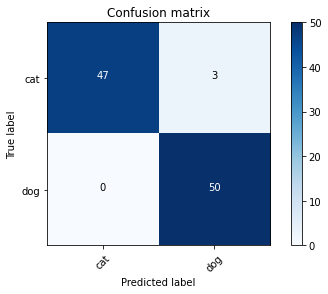

In [17]:
cm=confusion_matrix(y_true=test_dataset2.classes,y_pred=np.argmax(prediction,axis=-1))
skplot_confusion_matrix(cm,classes=['cat','dog'], title='Confusion matrix')